In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [6]:
data= pd.read_csv('spam.csv')

In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

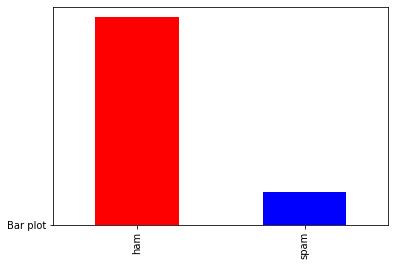

In [11]:
count = pd.value_counts(data["v1"],sort=True)
count.plot(kind="bar",color=["red","blue"])
plt.plot('Bar plot')
plt.show()

In [15]:
f = feature_extraction.text.CountVectorizer()
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8625)

In [16]:
data["v1"]

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [17]:
data["v1"]= data["v1"].map({"spam":1,"ham":0})
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [18]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.70, random_state=42)

In [19]:
#naive bayes claassifier
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [20]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.999402,0.973853,0.911877,0.894737
1,0.11001,0.997008,0.976160,0.942529,0.886486
2,0.22001,0.997606,0.978211,0.940613,0.900917
3,0.33001,0.997008,0.978723,0.934866,0.908752
4,0.44001,0.995212,0.980261,0.931034,0.922201
5,0.55001,0.995212,0.980005,0.917625,0.931907
6,0.66001,0.995212,0.979749,0.904215,0.942116
7,0.77001,0.994614,0.979236,0.890805,0.950920
8,0.88001,0.994016,0.978467,0.881226,0.954357
9,0.99001,0.992819,0.977698,0.869732,0.959831


In [21]:
#Testing the model
y_pred=bayes.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [22]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index,:]

alpha             6.600010
Train Accuracy    0.950329
Test Accuracy     0.935658
Test Recall       0.519157
Test Precision    1.000000
Name: 60, dtype: float64

In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix obtained: ")
print(cm)

Confusion Matrix obtained: 
[[3379    0]
 [ 411  111]]


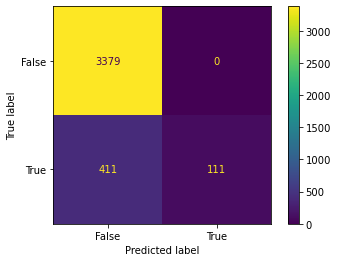

In [24]:
#confusion matrix for naive bayes 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False,True])
cm_display.plot()
plt.show()

In [25]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve For Naive Bayers:",roc_auc)

Area under the curve For Naive Bayers: 0.6063218390804598


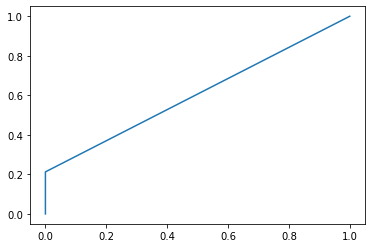

In [26]:
#Displaying the ROC curve for naive bayes
plt.plot(false_positive_rate,true_positive_rate)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3379
           1       1.00      0.21      0.35       522

    accuracy                           0.89      3901
   macro avg       0.95      0.61      0.65      3901
weighted avg       0.91      0.89      0.86      3901



In [28]:
#SVM Classification
#Creating a SVC model
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear', random_state = 10) #initialize the code module
svc_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=10)

In [29]:
y_pred1 = svc_model.predict(X_test)
print(y_pred1)

[0 0 1 ... 0 0 1]


In [30]:
#Confusion Matrix for Support Vector Machine classifier
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix obtained: ")
print(cm1)

Confusion Matrix obtained: 
[[3364   15]
 [  59  463]]


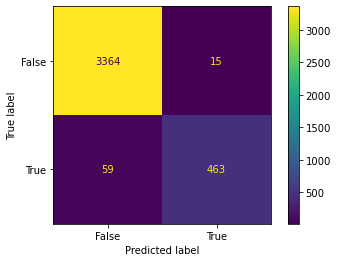

In [31]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [32]:
#Accuracy
print(svc_model.score(X_test,y_test))

0.9810305049987182


In [33]:
#ROC curve for SVC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve For SVC:",roc_auc)

Area under the curve For SVC: 0.9412669984431676


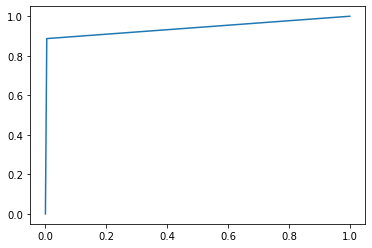

In [34]:
plt.plot(false_positive_rate,true_positive_rate)

In [35]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3379
           1       0.97      0.89      0.93       522

    accuracy                           0.98      3901
   macro avg       0.98      0.94      0.96      3901
weighted avg       0.98      0.98      0.98      3901

